In [1]:
""" Install Libraries """
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install sklearn
# !pip3 install matplotlib

""" Load Libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
def load_data():
    data_iris = load_iris()
    data = pd.DataFrame(data=np.c_[data_iris['data'], data_iris['target']], 
                    columns=data_iris['feature_names'] + ['class'])
    data['class'] = data['class'].astype('category')
    return data

# 1 - Load Dataset

In [3]:
data = load_data()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 2 - Descriptive Statistics

In [4]:
numerical = [c for c in data.columns if data[c].dtype == 'float64']

## 2.1 - Mean / Median
* 각 (연속형)변수의 평균과 중앙값을 알아본다

In [5]:
for c in numerical:
    mean, median = np.mean(data[c]), np.median(data[c])
    print('# 변수 : {} \t 평균 : {} \t 중앙값 : {}'.format(c, mean, median))

# 변수 : sepal length (cm) 	 평균 : 5.843333333333334 	 중앙값 : 5.8
# 변수 : sepal width (cm) 	 평균 : 3.0573333333333337 	 중앙값 : 3.0
# 변수 : petal length (cm) 	 평균 : 3.7580000000000005 	 중앙값 : 4.35
# 변수 : petal width (cm) 	 평균 : 1.1993333333333336 	 중앙값 : 1.3


## 2.2 - Variance / Standard Deviation
* 각 (연속형)변수의 분산과 표준편차를 알아본다

In [6]:
for c in numerical:
    var, std = np.var(data[c]), np.std(data[c])
    print('# 변수 : {} \t 분산 : {} \t 표준편차 : {}'.format(c, var, std))

# 변수 : sepal length (cm) 	 분산 : 0.6811222222222223 	 표준편차 : 0.8253012917851409
# 변수 : sepal width (cm) 	 분산 : 0.1887128888888889 	 표준편차 : 0.4344109677354946
# 변수 : petal length (cm) 	 분산 : 3.0955026666666665 	 표준편차 : 1.759404065775303
# 변수 : petal width (cm) 	 분산 : 0.5771328888888888 	 표준편차 : 0.7596926279021594


## 2.3 - Interquartile Range
* 각 (연속형)변수의 사분위 범위를 알아본다
* 사분위 범위 중 `Q1`은 하위 25%, `Q3`는 하위 75%에 위치하는 값을 나타내며, `IQR`은 Q3에서 Q1을 뺀 값으로 정의한다

In [7]:
for c in numerical:
    Q1, Q3 = np.percentile(data[c], 25), np.percentile(data[c], 75)
    IQR = Q3 - Q1
    print('# 변수 : {} \t Q1 : {} \t Q2 : {} \t IQR : {}'.format(c, Q1, Q3, IQR))

# 변수 : sepal length (cm) 	 Q1 : 5.1 	 Q2 : 6.4 	 IQR : 1.3000000000000007
# 변수 : sepal width (cm) 	 Q1 : 2.8 	 Q2 : 3.3 	 IQR : 0.5
# 변수 : petal length (cm) 	 Q1 : 1.6 	 Q2 : 5.1 	 IQR : 3.4999999999999996
# 변수 : petal width (cm) 	 Q1 : 0.3 	 Q2 : 1.8 	 IQR : 1.5


## 2.4 - Summary

In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3 - Visualization

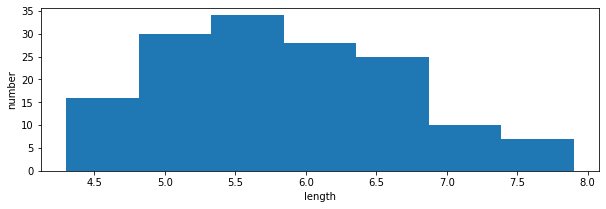

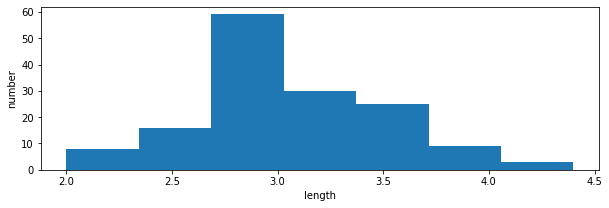

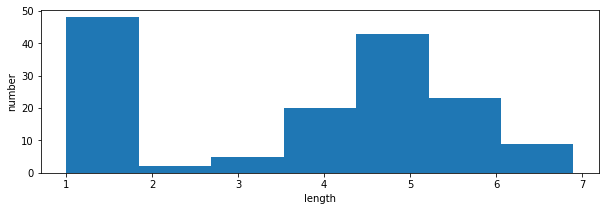

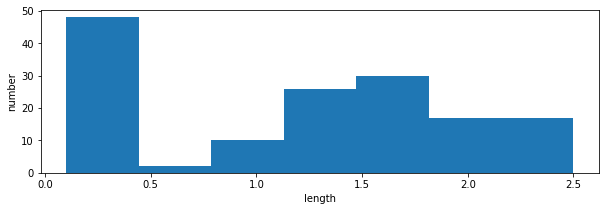

In [9]:
for c in numerical:
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(111)
    freq, _, _ = ax.hist(data[c], bins=7)
    ax.set_xlabel('length')
    ax.set_ylabel('number')
    plt.show()